In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

# model definition
from sklearn import svm as SVM
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

# ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# model metrics
from sklearn.metrics import accuracy_score

In [4]:
train = pd.read_csv('./data/train.csv', header=0, sep=',', quotechar='"', index_col='Id')
test = pd.read_csv('./data/test.csv', header=0, sep=',', quotechar='"', index_col='Id')

# define the data
train_data = train.drop('Cover_Type', axis=1)
test_data = test

# define the labels
train_labels = train['Cover_Type']

In [47]:
# define the validation set from train data
train_data, dev_data, train_labels, dev_labels = train_test_split(train_data, train_labels, stratify=train_labels, test_size=0.2, random_state=7)

# verify the split is stratified among the different classes
print('train_data.shape: {}'.format(train_data.shape))
print('train_labels.shape: {}'.format(train_labels.shape))
print(train_labels.value_counts())
print('dev_data.shape: {}'.format(dev_data.shape))
print('dev_labels.shape:{}'.format(dev_labels.shape))
print(dev_labels.value_counts())

train_data.shape: (12096, 54)
train_labels.shape: (12096,)
7    1728
6    1728
5    1728
4    1728
3    1728
2    1728
1    1728
Name: Cover_Type, dtype: int64
dev_data.shape: (3024, 54)
dev_labels.shape:(3024,)
7    432
5    432
3    432
1    432
6    432
4    432
2    432
Name: Cover_Type, dtype: int64


# Models

http://scikit-learn.org/stable/modules/multiclass.html

Models:

1. Logistic Regression: 0.66
2. Naive Bayes: 0.60
3. K-Nearest Neighbors: 0.80
4. Support Vector Machine: 0.15
5. Decision Trees: 0.78
6. Neural Networks: 0.59

With just the base case, KNN and Decision Trees perform the best.

## Logistic Regression

In [66]:
lr = LogisticRegression()
lr.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [69]:
accuracies = []
for i in range(1, 10):
    pred_dev_labels = lr.predict(dev_data)
    accuracies.append(accuracy_score(dev_labels, pred_dev_labels))
sum(accuracies)/len(accuracies)

0.6646825396825397

## Naive Bayes

In [63]:
nb = GaussianNB()
nb.fit(train_data, train_labels)

GaussianNB(priors=None)

In [64]:
accuracies = []
for i in range(1, 10):
    pred_dev_labels = nb.predict(dev_data)
    accuracies.append(accuracy_score(dev_labels, pred_dev_labels))
sum(accuracies)/len(accuracies)

0.5952380952380952

## K-Nearest Neighbors

In [56]:
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [57]:
accuracies = []
for i in range(1, 10):
    pred_dev_labels = knn.predict(dev_data)
    accuracies.append(accuracy_score(dev_labels, pred_dev_labels))
sum(accuracies)/len(accuracies)

0.798941798941799

## Support Vector Machine

In [67]:
svm = SVM.SVC() 
svm.fit(train_data, train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [68]:
accuracies = []
for i in range(1, 10):
    pred_dev_labels = svm.predict(dev_data)
    accuracies.append(accuracy_score(dev_labels, pred_dev_labels))
sum(accuracies)/len(accuracies)

0.1498015873015873

## Decision Trees

In [71]:
dt = DecisionTreeClassifier()
dt.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [72]:
accuracies = []
for i in range(1, 10):
    pred_dev_labels = dt.predict(dev_data)
    accuracies.append(accuracy_score(dev_labels, pred_dev_labels))
sum(accuracies)/len(accuracies)

0.7810846560846559

## Neural Networks

In [75]:
mlp = MLPClassifier()
mlp.fit(train_data, train_labels)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [76]:
accuracies = []
for i in range(1, 10):
    pred_dev_labels = mlp.predict(dev_data)
    accuracies.append(accuracy_score(dev_labels, pred_dev_labels))
sum(accuracies)/len(accuracies)

0.5925925925925926

# Ensemble

Ensemble:

5. Random Forest Classifier

## Random Forest Classifier

https://www.datacamp.com/community/tutorials/random-forests-classifier-python


In [48]:
# random forest classifier
rfc = RandomForestClassifier(n_estimators=100, bootstrap=True, oob_score=True)

In [49]:
# listing important features
rfc.fit(train_data, train_labels)
feature_imp = pd.Series(rfc.feature_importances_, index=train_data.columns).sort_values(ascending=False)
feature_imp

Elevation                             0.226441
Horizontal_Distance_To_Roadways       0.089994
Horizontal_Distance_To_Fire_Points    0.071048
Horizontal_Distance_To_Hydrology      0.061701
Vertical_Distance_To_Hydrology        0.055303
Hillshade_9am                         0.051507
Aspect                                0.050496
Hillshade_3pm                         0.047407
Wilderness_Area4                      0.046279
Hillshade_Noon                        0.045680
Slope                                 0.036811
Soil_Type10                           0.024399
Soil_Type3                            0.018595
Wilderness_Area3                      0.017774
Wilderness_Area1                      0.017736
Soil_Type39                           0.016007
Soil_Type38                           0.015802
Soil_Type4                            0.012870
Soil_Type40                           0.010156
Soil_Type30                           0.008694
Soil_Type2                            0.006546
Soil_Type22  

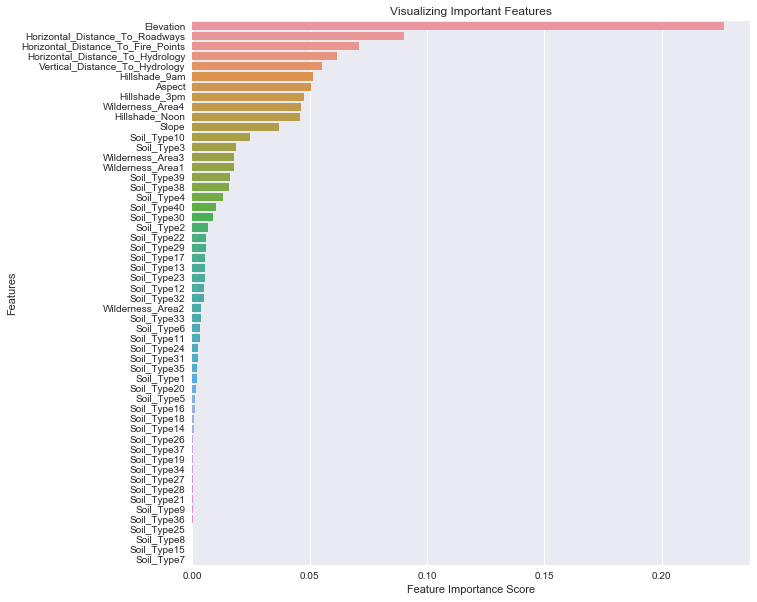

In [50]:
# plot important features
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x=feature_imp, y=feature_imp.index, ax=ax)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

In [54]:
accuracies = []
for i in range(1, 10):
    pred_dev_labels = rfc.predict(dev_data)
    accuracies.append(accuracy_score(dev_labels, pred_dev_labels))
sum(accuracies)/len(accuracies)

0.8548280423280425